In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

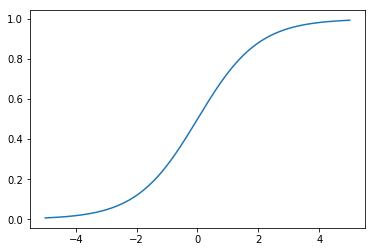

In [6]:
# -5到5内生成200个点
X = np.linspace(-5,5,200)
y = [1/(1 + math.e**(-x)) for x in X]
plt.plot(X,y)
plt.show()

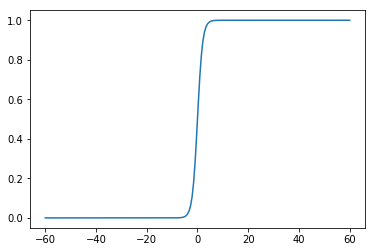

In [7]:
# 扩大x轴的范围
# -60到60内生成200个点
X = np.linspace(-60,60,200)
y = [1/(1 + math.e**(-x)) for x in X]
plt.plot(X,y)
plt.show()

使用BGD求解逻辑回归

伪代码：
    每个回归系数初始化为1
    重复下面的步骤直至收敛：
        计算整个数据集的梯度
        使用alpha*gradient更新回归系数的向量
    返回回归系数

In [12]:
import pandas as pd
import numpy as np
# 导入数据集
dataSet = pd.read_table('testSet.txt',header=None)
dataSet.columns = ['X1','X2','labels']

In [11]:
dataSet.head()

,X1,X2,labels
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [13]:
'''
定义辅助函数：
函数功能：计算sigmoid函数值
参数说明：
    inX：数值型数据
返回：
    s：经过sigmoid函数计算后的函数值
'''
def sigmoid(inX):
    s = 1/(1+ np.exp(-inX))
    return s

In [28]:
'''
为什么要标准化，见（pdf）
标准化函数
函数功能：标准化（期望为0，方差为1）
参数说明：
    xMat：特征矩阵
返回：
    inMat: 标准化之后的特征函数
'''
def regularize(xMat):
    inMat = xMat.copy()
    inMeans = np.mean(inMat,axis = 0) # axix = 0 ,压缩行，对各列求均值，返回1*n的矩阵 
    #print(inMeans)---->[[0.0300122 6.57611  ]]
    inVar = np.std(inMat,axis = 0) #求每一列的标准差
    #print(inVar)---->[[1.16447043 4.6216594 ]]
    inMat = (inMat - inMeans)/inVar # 标准化
    return inMat

In [49]:
'''
函数功能： 使用BGD求解逻辑回归

使用的梯度下降法的矩阵方式（见pdf）

参数说明：
    dataSet ： DF数据集
    alpha ： 步长
    maxCycle：最大迭代次数
返回：
    weights： 各特征权重值
'''
def BGD_LR(dataSet,alpha = 0.001,maxCycles = 500):
    xMat = np.mat(dataSet.iloc[:,:-1].values) # 提取出特征值
    yMat = np.mat(dataSet.iloc[:,-1].values).T # 提取出标签的值并转置
    xMat = regularize(xMat) # 标准化
    m , n = xMat.shape # 行，列:100,2
    weights = np.zeros((n,1)) # 生成一个n*1的列表
    # print(weights)---->[[0.]
    #                     [0.]
    #                     ]
    for i in range(maxCycles): # 迭代maxCycles次
        grad = xMat.T * (xMat * weights - yMat) / m # 各个特征的梯度
        weights = weights - alpha * grad # 更新权重值
    return weights

In [53]:
ws=BGD_LR(dataSet,alpha=0.01,maxCycles=500) 
xMat = np.mat(dataSet.iloc[:, :-1].values) 
yMat = np.mat(dataSet.iloc[:, -1].values).T 
xMat = regularize(xMat) 


In [64]:
'''
函数功能：计算准确率
参数说明：
    dataSet:DF数据集
    method：计算权重函数：方法名
    alpha：步长
    maxCycle：最大迭代次数
返回：
    准确率
'''
def logisticAcc(dataSet , method , alpha = 0.01, maxCycles = 500):
    weights = method(dataSet , alpha = alpha , maxCycles = maxCycles)
    xMat = dataSet.iloc[:,:-1].values # 提取所有特征
    yMat = dataSet.iloc[:,-1].values # 提取所有标签
    xMat = regularize(xMat) # 标准化
    p = sigmoid(xMat * weights).A.flatten() # 将矩阵转为array并且折叠成一维的数组，
    #但是该函数只能适用于numpy对象，即array或者mat，普通的list列表是不行的。 
    for i,j in enumerate(p):
        if j < 0.5:
            p[i] = 0
        else:
            p[i] = 1 
    train_error = (np.fabs(yMat - p)).sum() # 计算错误数
    train_acc = 1 - train_error/yMat.shape[0] # 计算准确率
    return train_acc

In [65]:
logisticAcc(dataSet,BGD_LR,alpha=0.01,maxCycles=500)

0.96

使用SGD求解逻辑回归

In [66]:

'''
函数功能： 使用SGD求解逻辑回归

使用的梯度下降法的矩阵方式（见pdf）

参数说明：
    dataSet ： DF数据集
    alpha ： 步长
    maxCycle：最大迭代次数
返回：
    weights： 各特征权重值
'''
def SGD_LR(dataSet,alpha = 0.001,maxCycles = 500):
    dataSet = dataSet.sample(maxCycles,replace = True)
    # maxCycles的含义是抽样的个数，是整数;smaple()函数中的replace参数的意思是：是否允许抽样值重复
    dataSet.index = range(dataSet.shape[0]) # 重新编排索引值
    xMat = np.mat(dataSet.iloc[:,:-1].values) # 提取出特征值
    yMat = np.mat(dataSet.iloc[:,-1].values).T # 提取出标签的值并转置
    xMat = regularize(xMat) # 标准化
    m , n = xMat.shape # 行，列:100,2
    weights = np.zeros((n,1)) # 生成一个n*1的列表
    # print(weights)---->[[0.]
    #                     [0.]
    #                     ]
    for i in range(m): # 迭代m次
        grad = xMat.T * (xMat * weights - yMat) / m # 各个特征的梯度
        weights = weights - alpha * grad # 更新权重值
    return weights

In [67]:
logisticAcc(dataSet,SGD_LR,alpha=0.01,maxCycles=500)

0.96

In [70]:
if __name__ == '__main__':
        print("BGD:",logisticAcc(dataSet,BGD_LR,alpha=0.01,maxCycles=500))
        print("SGD:",logisticAcc(dataSet,SGD_LR,alpha=0.01,maxCycles=500))

BGD: 0.96
SGD: 0.96


In [ ]:
if __name__ == '__main__':
    # 导入数据集
    dataSet = pd.read_table('testSet.txt',header=None)
    dataSet.columns = ['X1','X2','labels']
    print("BGD:",logisticAcc(dataSet,BGD_LR,alpha=0.01,maxCycles=500))
    print("SGD:",logisticAcc(dataSet,SGD_LR,alpha=0.01,maxCycles=500))